## Reed-Frost Model in R

*Author*: Sangeeta Bhatia

*Date*: 2018-10-01

- `xcurr` is the number of suspectible individuals at step j.
- `ycurr` is the number of infected individuals at step j.
- `q` is the probability that a suspectible individual 
escapes infection.
- `ynext` is the number of infected persons at step j + 1.

Everyone who is infected at step j becomes immune (or dies) at step j + 1. Thus at step j + 1, the number of susceptibles is `xcurr-ynext`. The following function gives the probability that the number of infected persons at 
$j+1$ is `ynext`.

In [1]:
reed_frost <- function(xcurr, ycurr, q, ynext) {
  pescape <- q^ycurr
  pynext <- choose(xcurr, ynext) *
      (1 - pescape)^ynext *
      pescape^(xcurr - ynext)
  pynext
}    

The number of infected people at a time step can be no greater 
than the number of suspectibles at the current time step.
So a sanity check for our code would for this number to be 0.


In [2]:
reed_frost(10, 5, 0.5, 11)

[1] 0

If the probability of escaping an infection is 1, then the 
probability that the number of infected at next time is 0 is 1.
Similarly at the other extreme, if probability of escaping an
infection is 0, then every susceptible becomes infected and 
the number of infected at next time is `xcurr`.

In [3]:
## Probability that ynext = 0 should be 1.
## 0 everywhere else.
reed_frost(10, 5, 1, 0:10)

## Probability that ynext = 10 should be 1.
## 0 everywhere else.
reed_frost(10, 5, 0, 0:10)

[1] 1 0 0 0 0 0 0 0 0 0 0

[1] 0 0 0 0 0 0 0 0 0 0 1

That works as expected. 

Now for various values of q and 
\(y_curr\), we can check the behavior of the model.
First we will load the needed libraries.

In [4]:
library(ggplot2)
library(dplyr)


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



In [5]:
pescape <- 0.9
ycurrs <- c(20, 40, 60, 80, 100)
probs <- purrr::map_dfc(ycurrs,
                             ~ reed_frost(xcurr = 100,
                                          ycurr = .x,
                                          q = pescape,
                                          ynext = 0:100))

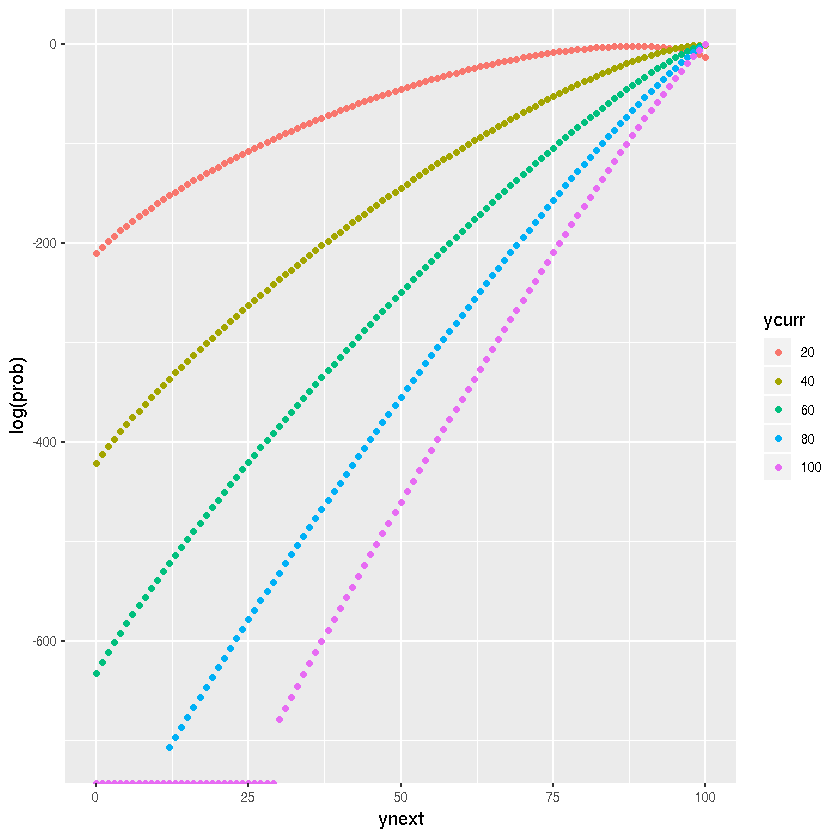

In [6]:
colnames(probs) <- ycurrs
probs %>%
    tidyr::gather(ycurr, prob, factor_key = TRUE) %>%
    ggplot(aes(rep(0:100, length(ycurrs)),
               log(prob),
               col = ycurr)) +
    geom_point() +
    xlab("ynext") +
    ylab("log(prob)")